## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [2]:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

## Data Import

In [3]:
train = pd.read_parquet("data/train_data.parquet", engine="fastparquet")
test = pd.read_parquet("data/test_data.parquet", engine="fastparquet")

## Data Preparation

In [4]:
X_train_sample, _, y_train_sample, _ = train_test_split(
    train.iloc[:, :-2],
    train.iloc[:, -1:],
    test_size=0.80,
    random_state=42,
    stratify=train.iloc[:, -1:],
)
X_test_sample, _, y_test_sample, _ = train_test_split(
    test.iloc[:, :-2],
    test.iloc[:, -1:],
    test_size=0.80,
    random_state=42,
    stratify=test.iloc[:, -1:],
)

## Functions

In [8]:
def find_best_n(
    n_range, f1_scores, acc_scores, value="Features", classifier="Classifier"
):
    print(f"Max F1 Score: {max(f1_scores)}")
    print(f"Best Number of Features (f1): {n_range[np.argmax(f1_scores)]}")
    print("=============================================")
    print(f"Max Accuracy Score: {max(acc_scores)}")
    print(f"Best Number of Features (acc): {n_range[np.argmax(acc_scores)]}")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    fig.suptitle(f"Number of {value} For {classifier}", fontsize=16)

    ax1.plot(n_range, f1_scores, label="F1 Score")
    ax1.scatter(n_range[np.argmax(f1_scores)], max(f1_scores), marker="x", color="red")
    ax1.annotate(
        f"({n_range[np.argmax(f1_scores)]})",
        xy=(n_range[np.argmax(f1_scores)], max(f1_scores)),
    )
    ax1.set_xlabel(f"Number of {value}")
    ax1.set_ylabel("F1 Score")
    ax1.set_title(f"F1 Score vs Number of {value}")

    ax2.plot(n_range, acc_scores, label="Accuracy Score")
    ax2.scatter(
        n_range[np.argmax(acc_scores)], max(acc_scores), marker="x", color="red"
    )
    ax2.annotate(
        f"({n_range[np.argmax(acc_scores)]})",
        xy=(n_range[np.argmax(acc_scores)], max(acc_scores)),
    )
    ax2.set_xlabel(f"Number of {value}")
    ax2.set_ylabel("Accuracy Score")
    ax2.set_title(f"Accuracy Score vs Number of {value}")

    plt.show()

## Feature Exploration

In [6]:
# correlation_matrix = X_train_sample.corr()
# plt.figure(figsize=(120, 100))
# cmap = sns.diverging_palette(250, 280, as_cmap=True)
# sns.heatmap(correlation_matrix, cmap=cmap, center=0, linewidths=0.5)
# plt.title("Correlation Matrix")
# plt.show()

## Feature Engineering

### Recursive Feature Elimination

Max F1 Score: 0.9640959734832437
Best Number of Features (f1): 180
Max Accuracy Score: 0.9643463497453311
Best Number of Features (acc): 180


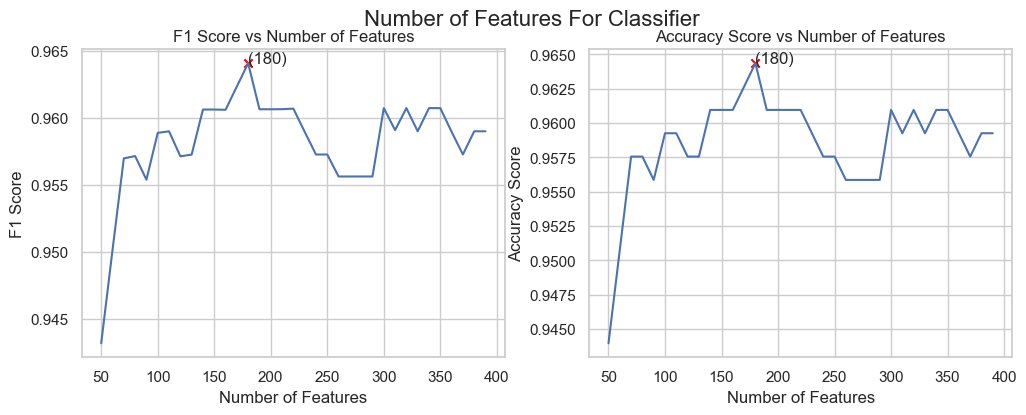

In [9]:
n_features_range = np.arange(50, 400, 10)
f1_scores = []
acc_scores = []

for n_features in n_features_range:
    estimator = LogisticRegression()
    rfe = RFE(estimator, step=10, n_features_to_select=n_features)

    rfe.fit(X_train_sample, y_train_sample)
    selected_features = X_train_sample.columns[rfe.support_]
    estimator.fit(X_train_sample[selected_features], y_train_sample)
    y_pred = estimator.predict(X_test_sample[selected_features])
    f1_scores.append(f1_score(y_test_sample, y_pred, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred))

find_best_n(n_features_range, f1_scores, acc_scores)

Max F1 Score: 0.9227513016916498
Best Number of Features (f1): 320
Max Accuracy Score: 0.9235993208828522
Best Number of Features (acc): 320


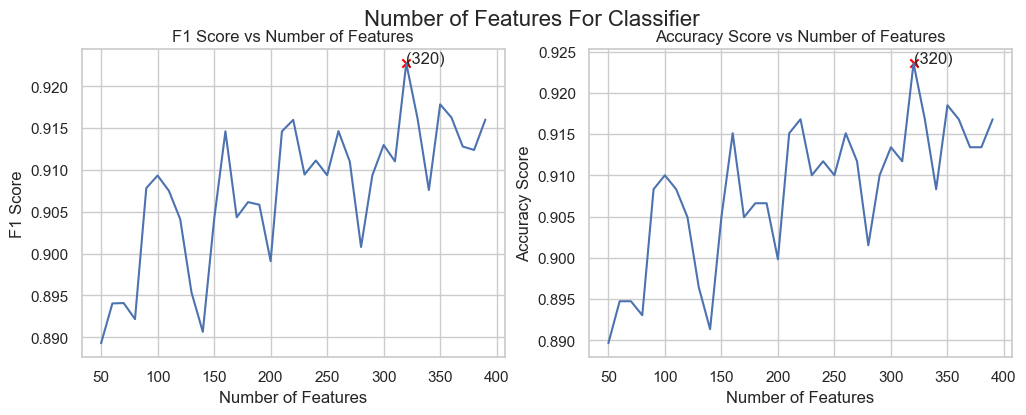

In [10]:
n_features_range = np.arange(50, 400, 10)
f1_scores = []
acc_scores = []

for n_features in n_features_range:
    estimator = RandomForestClassifier()
    rfe = RFE(estimator, step=25, n_features_to_select=n_features)

    rfe.fit(X_train_sample, y_train_sample)
    selected_features = X_train_sample.columns[rfe.support_]
    estimator.fit(X_train_sample[selected_features], y_train_sample)
    y_pred = estimator.predict(X_test_sample[selected_features])
    f1_scores.append(f1_score(y_test_sample, y_pred, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred))

find_best_n(n_features_range, f1_scores, acc_scores)

Max F1 Score: 0.9640801792760665
Best Number of Features (f1): 300
Max Accuracy Score: 0.9643463497453311
Best Number of Features (acc): 300


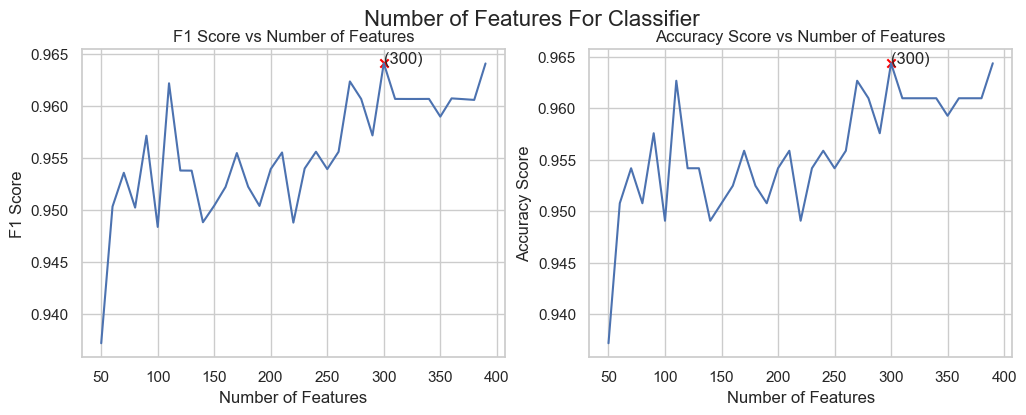

In [11]:
n_features_range = np.arange(50, 400, 10)
f1_scores = []
acc_scores = []

for n_features in n_features_range:
    estimator = LinearSVC()
    rfe = RFE(estimator, step=10, n_features_to_select=n_features)

    rfe.fit(X_train_sample, y_train_sample)
    selected_features = X_train_sample.columns[rfe.support_]
    estimator.fit(X_train_sample[selected_features], y_train_sample)
    y_pred = estimator.predict(X_test_sample[selected_features])
    f1_scores.append(f1_score(y_test_sample, y_pred, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred))

find_best_n(n_features_range, f1_scores, acc_scores)

### Variance Threshold

Max F1 Score: 0.9607958159401521
Best Number of Features (f1): 0.03
Max Accuracy Score: 0.9609507640067911
Best Number of Features (acc): 0.01


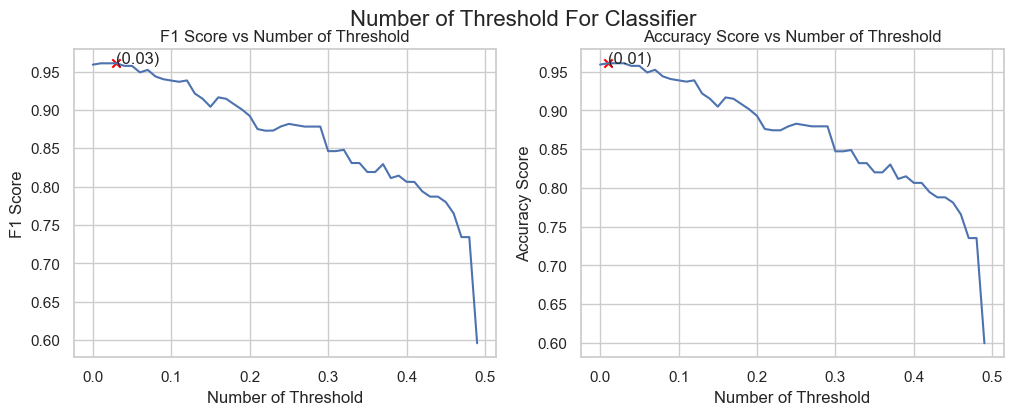

In [12]:
threshold_range = np.arange(0.0, 0.50, 0.01)
acc_scores = []
f1_scores = []
for thresh in threshold_range:
    vt = VarianceThreshold(threshold=thresh)
    vt.fit(X_train_sample)
    X_train_vt = vt.transform(X_train_sample)
    X_test_vt = vt.transform(X_test_sample)

    model = LogisticRegression()
    model.fit(X_train_vt, y_train_sample)
    y_pred = model.predict(X_test_vt)
    f1_scores.append(f1_score(y_test_sample, y_pred, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred))

find_best_n(threshold_range, f1_scores, acc_scores, value="Threshold")

Max F1 Score: 0.923057533853514
Best Number of Features (f1): 0.01
Max Accuracy Score: 0.9235993208828522
Best Number of Features (acc): 0.01


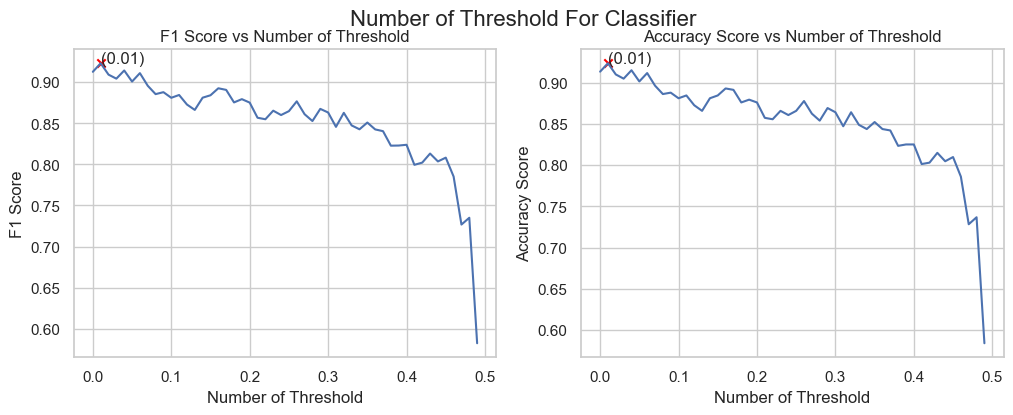

In [13]:
threshold_range = np.arange(0.0, 0.50, 0.01)
acc_scores = []
f1_scores = []
for thresh in threshold_range:
    vt = VarianceThreshold(threshold=thresh)
    vt.fit(X_train_sample)
    X_train_vt = vt.transform(X_train_sample)
    X_test_vt = vt.transform(X_test_sample)

    model = RandomForestClassifier()
    model.fit(X_train_vt, y_train_sample)
    y_pred = model.predict(X_test_vt)
    f1_scores.append(f1_score(y_test_sample, y_pred, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred))

find_best_n(threshold_range, f1_scores, acc_scores, value="Threshold")

Max F1 Score: 0.9624235064331449
Best Number of Features (f1): 0.02
Max Accuracy Score: 0.9626485568760611
Best Number of Features (acc): 0.02


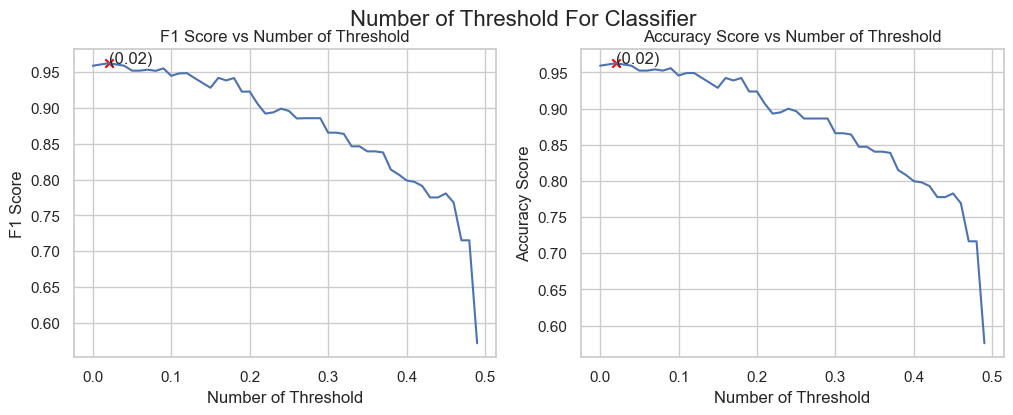

In [14]:
threshold_range = np.arange(0.0, 0.50, 0.01)
acc_scores = []
f1_scores = []
for thresh in threshold_range:
    vt = VarianceThreshold(threshold=thresh)
    vt.fit(X_train_sample)
    X_train_vt = vt.transform(X_train_sample)
    X_test_vt = vt.transform(X_test_sample)

    model = LinearSVC()
    model.fit(X_train_vt, y_train_sample)
    y_pred = model.predict(X_test_vt)
    f1_scores.append(f1_score(y_test_sample, y_pred, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred))

find_best_n(threshold_range, f1_scores, acc_scores, value="Threshold")

### Principal Component Analysis

Max F1 Score: 0.9641727542067572
Best Number of Features (f1): 350
Max Accuracy Score: 0.9643463497453311
Best Number of Features (acc): 195


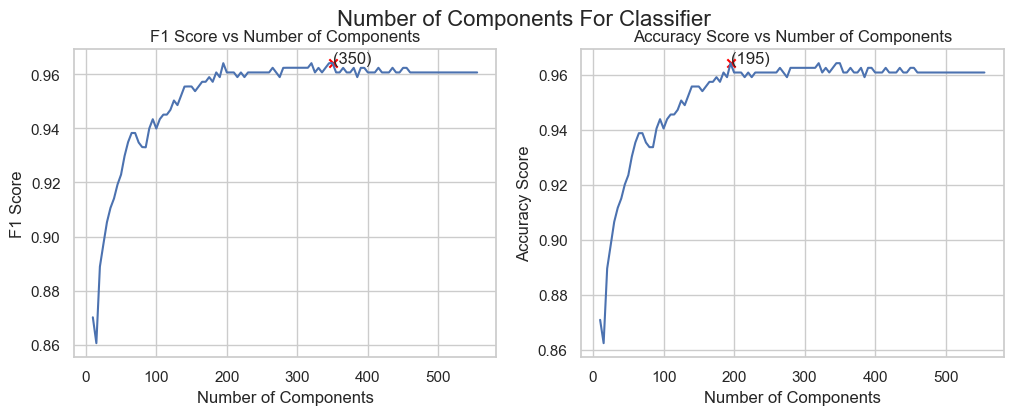

In [15]:
n_components_list = range(10, 560, 5)
f1_scores = []
acc_scores = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_sample)

    X_train_pca = pca.transform(X_train_sample)
    X_test_pca = pca.transform(X_test_sample)

    model = LogisticRegression()
    model.fit(X_train_pca, y_train_sample)

    y_pred_pca = model.predict(X_test_pca)
    f1_scores.append(f1_score(y_test_sample, y_pred_pca, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred_pca))

find_best_n(
    n_components_list,
    f1_scores,
    acc_scores,
    value="Components",
)

Max F1 Score: 0.9061521334444222
Best Number of Features (f1): 100
Max Accuracy Score: 0.9066213921901528
Best Number of Features (acc): 100


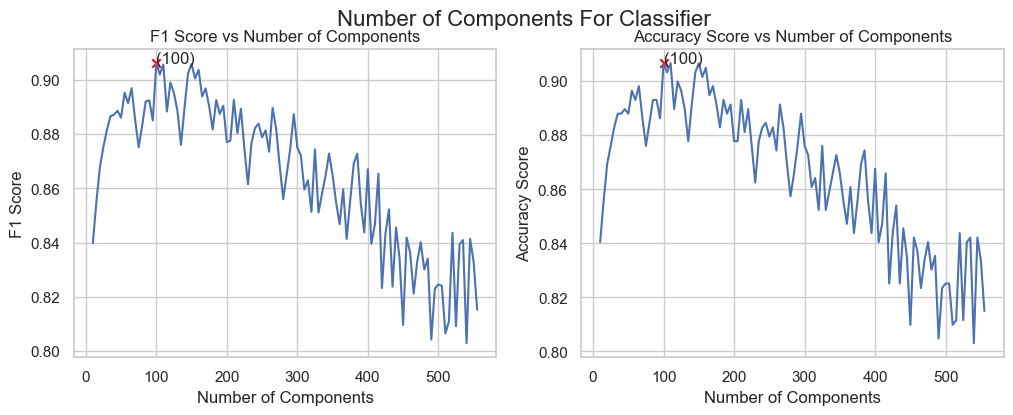

In [16]:
n_components_list = range(10, 560, 5)
f1_scores = []
acc_scores = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_sample)

    X_train_pca = pca.transform(X_train_sample)
    X_test_pca = pca.transform(X_test_sample)

    model = RandomForestClassifier()
    model.fit(X_train_pca, y_train_sample)

    y_pred_pca = model.predict(X_test_pca)
    f1_scores.append(f1_score(y_test_sample, y_pred_pca, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred_pca))

find_best_n(n_components_list, f1_scores, acc_scores, value="Components")

Max F1 Score: 0.9589077793920847
Best Number of Features (f1): 205
Max Accuracy Score: 0.9592529711375212
Best Number of Features (acc): 205


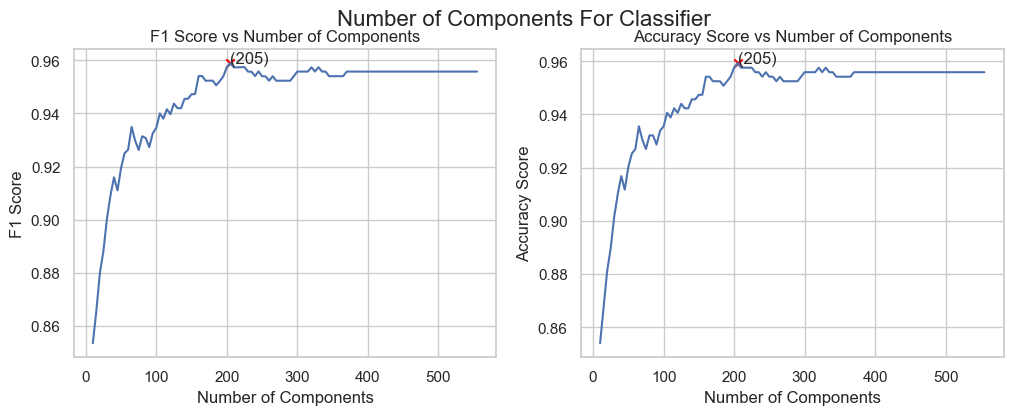

In [17]:
n_components_list = range(10, 560, 5)
f1_scores = []
acc_scores = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_sample)

    X_train_pca = pca.transform(X_train_sample)
    X_test_pca = pca.transform(X_test_sample)

    model = LinearSVC()
    model.fit(X_train_pca, y_train_sample)

    y_pred_pca = model.predict(X_test_pca)
    f1_scores.append(f1_score(y_test_sample, y_pred_pca, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred_pca))

find_best_n(n_components_list, f1_scores, acc_scores, value="Components")

### PCA + RFE

In [ ]:
estimator = LogisticRegression()
rfe = RFE(estimator, step=5, n_features_to_select=360)
rfe.fit(X_train_sample, y_train_sample)
selected_features = X_train_sample.columns[rfe.support_]
X_train_rfe_sample = X_train_sample[selected_features]
X_test_rfe_sample = X_test_sample[selected_features]

Max F1 Score: 0.9500391869343795
Best Number of Features (f1): 95
Max Accuracy Score: 0.9502262443438914
Best Number of Features (acc): 95


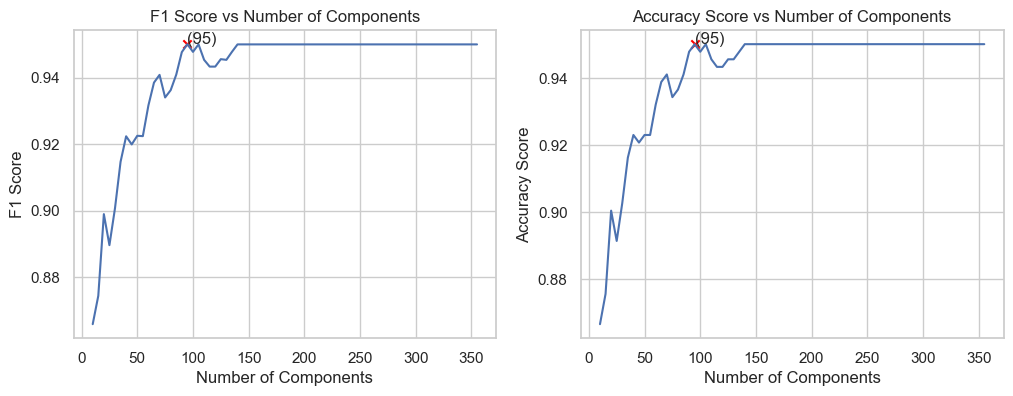

In [ ]:
n_components_list = range(10, 360, 5)
f1_scores = []
acc_scores = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)

    X_train_rfepca = pca.fit_transform(X_train_rfe_sample)
    X_test_rfepca = pca.transform(X_test_rfe_sample)

    model = LogisticRegression()
    model.fit(X_train_rfepca, y_train_sample)

    y_pred_rfepca = model.predict(X_test_rfepca)
    f1_scores.append(f1_score(y_test_sample, y_pred_rfepca, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred_rfepca))

find_best_n(n_components_list, f1_scores, acc_scores, value="Components")

In [ ]:
estimator = RandomForestClassifier()
rfe = RFE(estimator, step=5, n_features_to_select=360)
rfe.fit(X_train_sample, y_train_sample)
selected_features = X_train_sample.columns[rfe.support_]
X_train_rfe_sample = X_train_sample[selected_features]
X_test_rfe_sample = X_test_sample[selected_features]

Max F1 Score: 0.8974942041583082
Best Number of Features (f1): 120
Max Accuracy Score: 0.8981900452488688
Best Number of Features (acc): 65


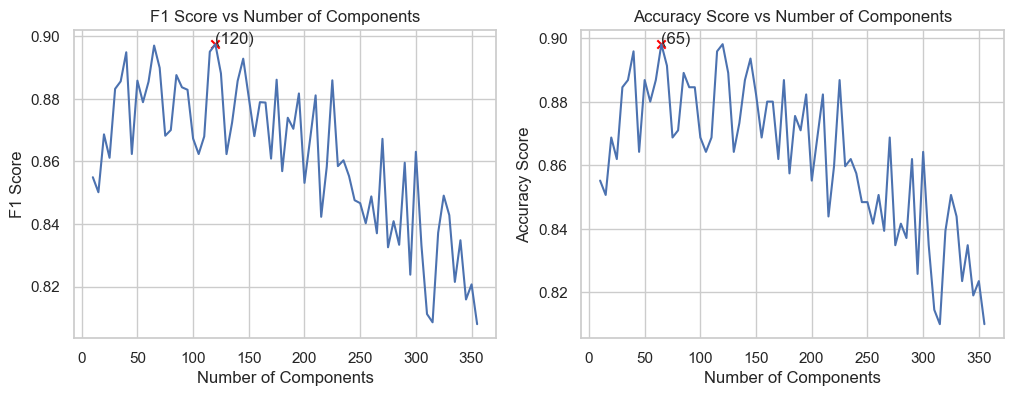

In [ ]:
n_components_list = range(10, 360, 5)
f1_scores = []
acc_scores = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)

    X_train_rfepca = pca.fit_transform(X_train_rfe_sample)
    X_test_rfepca = pca.transform(X_test_rfe_sample)

    model = RandomForestClassifier()
    model.fit(X_train_rfepca, y_train_sample)

    y_pred_rfepca = model.predict(X_test_rfepca)
    f1_scores.append(f1_score(y_test_sample, y_pred_rfepca, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred_rfepca))

find_best_n(n_components_list, f1_scores, acc_scores, value="Components")

In [ ]:
estimator = LinearSVC()
rfe = RFE(estimator, step=5, n_features_to_select=70)
rfe.fit(X_train_sample, y_train_sample)
selected_features = X_train_sample.columns[rfe.support_]
X_train_rfe_sample = X_train_sample[selected_features]
X_test_rfe_sample = X_test_sample[selected_features]

Max F1 Score: 0.9411017420522041
Best Number of Features (f1): 55
Max Accuracy Score: 0.9411764705882353
Best Number of Features (acc): 45


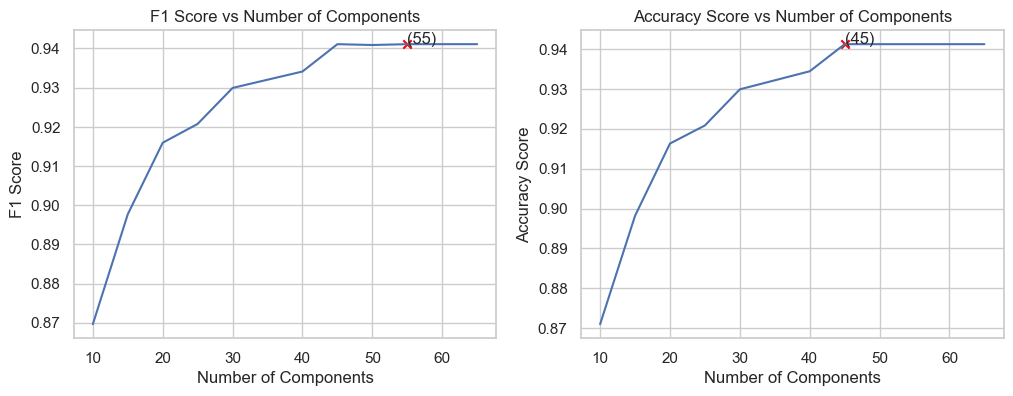

In [ ]:
n_components_list = range(10, 70, 5)
f1_scores = []
acc_scores = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)

    X_train_rfepca = pca.fit_transform(X_train_rfe_sample)
    X_test_rfepca = pca.transform(X_test_rfe_sample)

    model = LinearSVC()
    model.fit(X_train_rfepca, y_train_sample)

    y_pred_rfepca = model.predict(X_test_rfepca)
    f1_scores.append(f1_score(y_test_sample, y_pred_rfepca, average="weighted"))
    acc_scores.append(accuracy_score(y_test_sample, y_pred_rfepca))

find_best_n(n_components_list, f1_scores, acc_scores, value="Components")